# Decision Tree Example with Own Data. TBD incl. Decision Boundaey (2 DIM)
## Imports

In [41]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz # to visualize decision tree

## Build Decision Tree with custom data 1

In [108]:
# ------------------------------------------------------
# | Salary | Capital | Credit Amount | Class: "High Risk" (1) vs "Low Risk" (0)
# | 150000 | 300000  | 60000 | 0
# | 130000 | 200000  | 180000 | 1
# | 120000 | 500000  | 200000 | 0
# | 120000 | 500000  | 400000 | 1
# | 70000  | 150000  | 500000 | 1
# | 60000  | 200000  | 90000 | 0
# | 65000  | 30000   | 40000 | 1
# | 80000  | 300000   | 40000 | 0
# ------------------------------------------------------

X = [[150000, 300000, 60000], [130000, 200000, 180000], [120000, 500000, 200000], [120000, 500000, 400000], 
     [70000, 150000, 500000], [60000, 200000, 90000], [650000, 30000, 40000] ,[20000, 300000, 40000]]
y = [0, 1, 0, 1, 1, 0, 1, 1]

# Set min samples split to 3 to keep tree small
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
clf.fit(X, y)

feature_names = ["Salary [USD]", "Capital [USD]", "Credit Amount [USD]"]
X_test = [[125000, 400000, 70000], [25000, 40000, 80000],[100000, 110000, 60000]]
class_names = ["Low Risk", "High Risk"]
y_test = [ 0, 1, 0]

# Predict classes of test set
y_predicted = clf.predict(X_test)

# Measure accuracy
acc = accuracy_score(y_test, y_predicted)
print("Accuracy=", round(acc,2), "%")

Accuracy= 0.67 %


## Build Decision Tree with custom data 2

In [110]:
X = [[150000, 300000, 100000], [130000, 50000, 180000], [120000, 100000, 100000], [170000, 200000, 400000], 
     [70000, 120000, 120000], [65000, 100000, 20000], [650000, 0, 40000] ,[20000, 100000, 50000]]
y = [0, 1, 0, 1, 1, 0, 0, 1]

# Set min samples split to 3 to keep tree small
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

feature_names = ["Salary [USD]", "Capital [USD]", "Credit Amount [USD]"]
X_test = [[125000, 400000, 70000], [25000, 40000, 80000],[100000, 110000, 60000]]
class_names = ["Low Risk", "High Risk"]
y_test = [ 0, 1, 0]

# Predict classes of test set
y_predicted = clf.predict(X_test)

# Measure accuracy
acc = accuracy_score(y_test, y_predicted)
print("Accuracy=", round(acc,2), "%")

Accuracy= 1.0 %


## Visualize Decision Tree (graphviz)

In [111]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names, class_names=class_names) 
graph = graphviz.Source(dot_data) 
graph.render("Example-depth-2-Decision-Tree-Entropy-DepthTBD2")

'Example-depth-2-Decision-Tree-Entropy-DepthTBD2.pdf'

## TBD: Visualize Decision Boundaries

In [89]:
print(clf)
print(clf.feature_importances_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[1. 0.]


## Example from scikit-learn

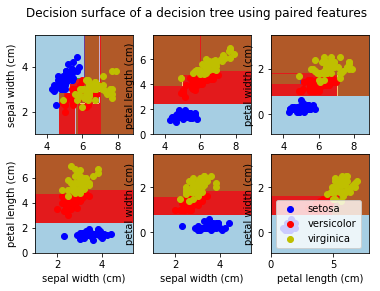

In [2]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()